<a href="https://colab.research.google.com/github/DeathSaw/BE-ML/blob/main/ML_LAB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/HousingData.csv')

In [1]:
data.describe()

NameError: name 'data' is not defined

In [ ]:
missing_values = data.isna().sum() #for each column this stores the number of na in an array
print(missing_values)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# List of columns with NaN values
na_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Fill NaN values in these columns with the mean of the column
data[na_columns] = data[na_columns].fillna(data.mean())

print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  MEDV  
0       15.3  396.90   

In [ ]:
new_missing_values = data.isna().sum() #for each column this stores the number of na in an array
print("Earlier Missing Values\n",missing_values,"New missing v",new_missing_values)

Earlier Missing Values
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64 New missing v CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [ ]:
correlation_matrix = data.corr().round(2)

<Axes: >

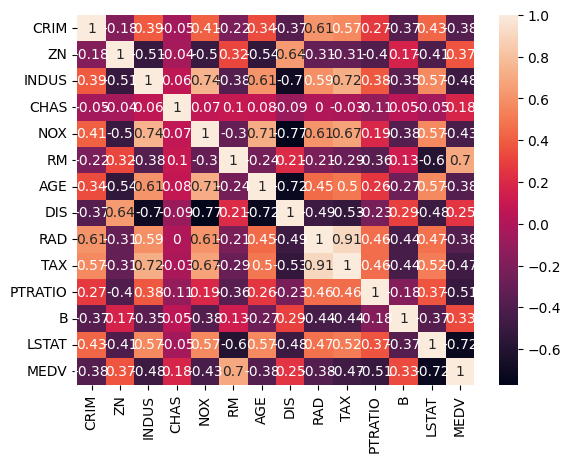

In [ ]:
sns.heatmap(data=correlation_matrix, annot=False)

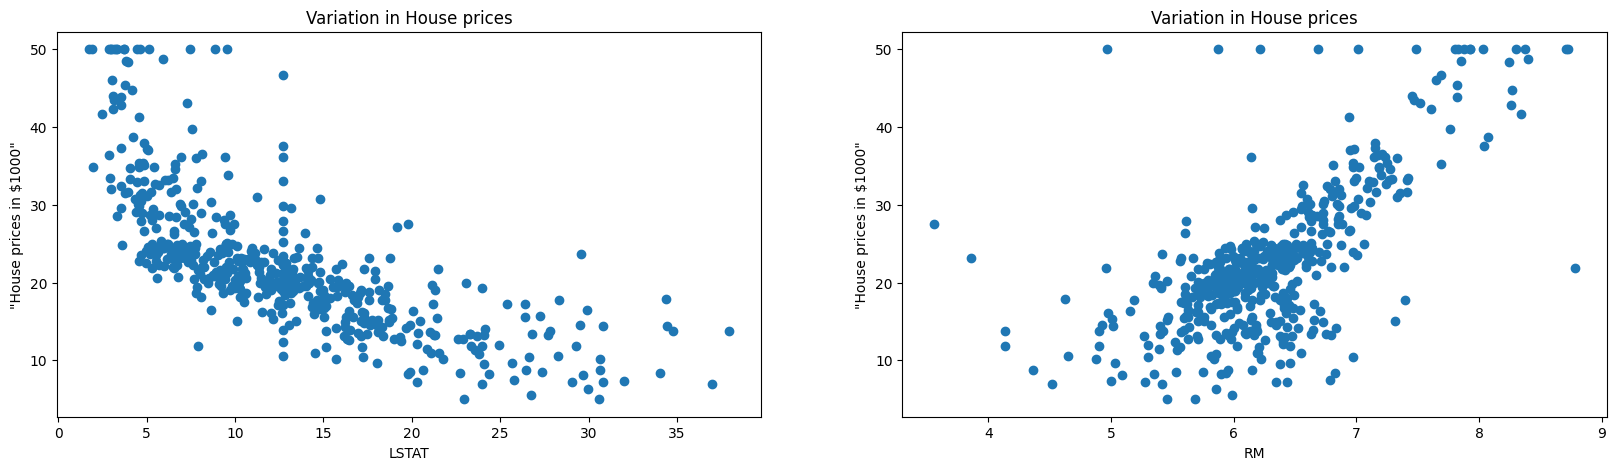

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [ ]:
X = data.RM #all attributes except the dependent
y = data.MEDV #dependent attribute
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(506, 1)
(506, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [ ]:
reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_train_predict_1 = reg_1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_1)))
r2 = round(reg_1.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [ ]:
y_pred_1 = reg_1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_1)))
r2 = round(reg_1.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




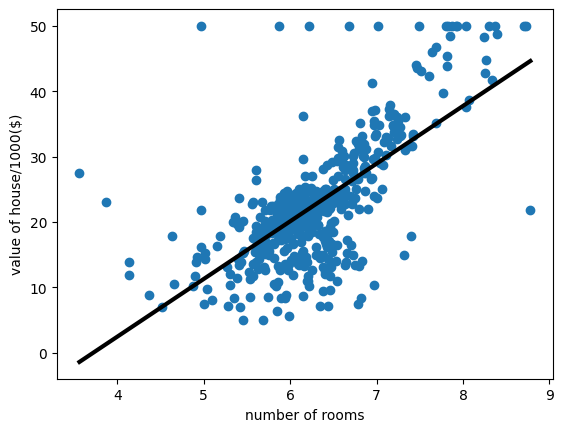

In [ ]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()